<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/Alpha_vantage_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install quandl
!pip install alpha-vantage

     |████████████████████████████████| 1.3MB 6.3MB/s 
     |████████████████████████████████| 143kB 18.3MB/s 
     |████████████████████████████████| 296kB 14.1MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=594457537312c99bb05588280b876a3f4d5bc067484d0cc56d674291856451a9
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=ca87eccb3ddbee52b1785de98a2221500acd2c33c41eec796fa61fac43c94c16
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [4]:
import json
import requests
import quandl
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import bs4 as bs
import pickle
import requests
import os
import time 
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
#from Keys import alpha_vantage_api_key

In [16]:
#!pip install quandl

In [42]:
alpha_api_key = 'DN2P29DJIFP0RGAP'

ts = TimeSeries(key=alpha_api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(['TSLA'], interval='5min', outputsize='full') # u can call only 100 

In [47]:
period = 60

In [48]:
ti = TechIndicators(key=alpha_api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='TSLA', interval='1min',
                                   time_period=period, series_type='close')
#getting simple moving average

In [49]:
df1 = data_ti
df2 = data_ts['4. close'].iloc[period-1::]

In [50]:
df2.index = df1.index

ValueError: ignored

In [41]:
total_df = pd.concat([df1, df2], axis=1)
print(total_df)

                          SMA  4. close
date                                   
2020-11-05 05:50:00  430.9650       NaN
2020-11-05 05:55:00  430.9957       NaN
2020-11-05 06:00:00  431.0298       NaN
2020-11-05 06:01:00  431.0535       NaN
2020-11-05 06:05:00  431.0738       NaN
...                       ...       ...
2020-11-18 19:56:00  484.8796       NaN
2020-11-18 19:57:00  484.8358       NaN
2020-11-18 19:58:00  484.7689       NaN
2020-11-18 19:59:00  484.6933       NaN
2020-11-18 20:00:00  484.6181       NaN

[7864 rows x 2 columns]


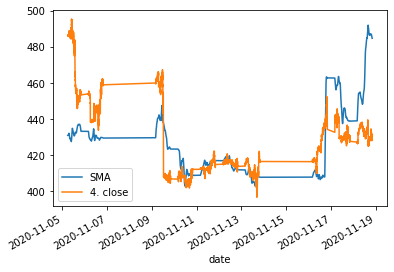

In [35]:
total_df.plot()
plt.show()

In [6]:
ts.get_daily('GE')

(            1. open  2. high  3. low  4. close    5. volume
 date                                                       
 2020-11-18     9.97   10.050   9.725      9.73  148865809.0
 2020-11-17     9.45    9.735   9.330      9.68   90348624.0
 2020-11-16     9.61    9.640   9.420      9.57  118771994.0
 2020-11-13     8.86    9.250   8.850      9.25  130158746.0
 2020-11-12     8.76    8.870   8.670      8.76   79618484.0
 ...             ...      ...     ...       ...          ...
 2020-07-07     6.89    6.890   6.750      6.76   62213355.0
 2020-07-06     6.98    7.080   6.890      7.00   75276532.0
 2020-07-02     6.86    7.040   6.810      6.82   74100395.0
 2020-07-01     6.93    7.010   6.710      6.74  120516852.0
 2020-06-30     6.71    6.870   6.660      6.83   69304637.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'GE',
  '3. Last Refreshed': '2020-11-18',
  '4. Output Size': 'Compact',
  '5. Time Zone': 

In [7]:
ti = TechIndicators(key=alpha_api_key, output_format='pandas')
data, meta_data = ti.get_mfi(symbol='GE', interval='daily', time_period=60*24)

In [10]:
#rsi = overbought or oversold
data, meta_data = ti.get_rsi(symbol='GE', interval='daily', time_period=60*24)
#mfi - money flow index
data, meta_data = ti.get_mfi(symbol='GE', interval='daily', time_period=60*24)
#ema
data, meta_data = ti.get_ema(symbol='GE', interval='daily', time_period=60*24)
#SMA
data, meta_data = ti.get_sma(symbol='GE', interval='daily', time_period=60*24)
#STOCH
data, meta_data = ti.get_stoch(symbol='MSFT', interval='daily')
#CCI
#data, meta_data = ti.get_cci(symbol='MSFT', interval='daily', time_period=60*24)
#OBV
data, meta_data = ti.get_obv(symbol='MSFT', interval='daily')
#AROON
#data, meta_data = ti.get_aroon(symbol='MSFT', interval='daily', time_period=60*24)
#MIDPOINT
#data, meta_data = ti.get_midpoint(symbol='MSFT', interval='daily', time_period=60*24)
#BOP
#data, meta_data = ti.get_bop(symbol='MSFT', interval='daily', time_period=60*24)

#df_clust = pd.merge(df_clust,magic, on="Symbol", how="inner")


In [ ]:
# 5 per minute, # 500 calls per day
# MSFT, FB, GOOGL, TSLA, AAPL, ORCL, ADBE, CRM, AMZN, PF
